In [10]:
# import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [3]:
# bringing in the dataset
food_data_path = "Resources/FoodDesert2015.csv"

food_df = pd.read_csv(food_data_path)

In [4]:
#preview dataframe for reference
food_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72859,56043000200,Wyoming,Washakie,0,3326,1317,0,57,0.017138,0,...,593,3106,6,15,0,27,172,309,56,116
72860,56043000301,Wyoming,Washakie,1,2665,1154,0,10,0.003752,0,...,399,2377,5,23,0,40,220,446,114,124
72861,56043000302,Wyoming,Washakie,1,2542,1021,0,73,0.028717,0,...,516,2312,11,10,1,26,182,407,82,97
72862,56045951100,Wyoming,Weston,0,3314,1322,0,252,0.076041,0,...,499,3179,15,10,1,47,62,91,108,50


In [5]:
#filter dataframe by Missouri
missouri_df = food_df[food_df["State"] == "Missouri"]
missouri_df

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
37373,29001950100,Missouri,Adair,0,3802,1456,0,0,0.000000,0,...,553,3720,7,21,0,17,37,22,43,88
37374,29001950200,Missouri,Adair,0,3019,1223,0,0,0.000000,0,...,510,2964,5,8,0,12,30,22,35,145
37375,29001950300,Missouri,Adair,1,2951,1388,0,52,0.017621,0,...,269,2721,49,73,3,10,95,77,214,241
37376,29001950400,Missouri,Adair,0,3892,1727,0,41,0.010534,0,...,663,3703,36,60,4,13,76,83,103,206
37377,29001950500,Missouri,Adair,1,7079,2992,0,379,0.053539,1,...,998,6581,149,134,2,20,193,172,337,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38761,29510127200,Missouri,St. Louis City,1,4075,2100,0,199,0.048834,0,...,515,3100,651,195,0,12,117,124,209,146
38762,29510127300,Missouri,St. Louis City,1,3769,1643,0,131,0.034757,0,...,352,1040,2523,86,0,10,110,54,239,375
38763,29510127400,Missouri,St. Louis City,1,4795,2046,0,0,0.000000,0,...,346,1206,3438,48,1,8,94,62,694,981
38764,29510127500,Missouri,St. Louis City,1,2237,1264,0,12,0.005364,0,...,180,521,1649,21,1,1,44,30,365,327


In [6]:
#create dataframe with columns that will be used for scatter plots
scatter_df = missouri_df[['CensusTract',
                          'County',
                          'lapop1',
                          'PovertyRate'
                 ]]
#rename columns for clarity
scatter_df = scatter_df.rename(columns={"lapop1": "TotalPop1MileFromSupermarket",})
scatter_df.head(20)

,CensusTract,County,TotalPop1MileFromSupermarket,PovertyRate
37373,29001950100,Adair,3679.872817,14.8
37374,29001950200,Adair,3018.929115,15.9
37375,29001950300,Adair,186.836071,44.0
37376,29001950400,Adair,472.727219,11.5
37377,29001950500,Adair,5399.865322,27.5
37378,29001950900,Adair,0.000000,53.9
37379,29001951000,Adair,167.606583,61.1
37380,29003010100,Andrew,4290.003170,7.7
37381,29003010200,Andrew,1588.042322,9.7
37382,29003010300,Andrew,2062.999995,11.9


In [7]:
#find the mean, and median of the poverty rate
poverty_mean = scatter_df.groupby("County").mean()["PovertyRate"]
poverty_median = scatter_df.groupby("County").median()["PovertyRate"]

#find the total population that lives 1 mile or more from a supermarket by summing relevant column
total_pop_sum = scatter_df.groupby("County").sum()["TotalPop1MileFromSupermarket"]

#create new dataframe that stores variable values
poverty_info = pd.DataFrame({"Poverty Rate Mean":poverty_mean,
                                  "Poverty Rate Median":poverty_median,
                                  "Low Access": total_pop_sum
                            })
#preview dataframe for reference
poverty_info

,Poverty Rate Mean,Poverty Rate Median,Low Access
County,,,
Adair,32.671429,27.50,12925.837127
Andrew,9.925000,10.05,10992.045476
Atchison,11.200000,11.20,4105.650403
Audrain,17.442857,20.20,14060.101377
Barry,20.057143,18.40,27000.071487
...,...,...,...
Washington,22.880000,22.20,21642.405984
Wayne,21.825000,21.80,11840.652124
Webster,17.275000,18.05,27321.979177


The r value is -0.18144463298074934


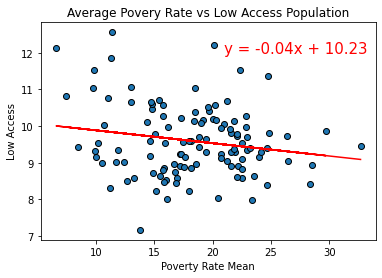

In [22]:
#set x and y values
x_values=poverty_info["Poverty Rate Mean"]
#because the data numbers are large values for y_values, use log base 10 to shrink values that are more comparable to x_values
y_values=np.log(poverty_info["Low Access"])
#create linear regression values and plot the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker ="o", edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,12),fontsize=15,color="red")
plt.title("Average Povery Rate vs Low Access Population")
plt.xlabel("Poverty Rate Mean")
plt.ylabel("Low Access")
#see if the r value shows any correlation in the data plotted.
print(f'The r value is {rvalue}')
#save and display figure
plt.savefig("output_data/PovertyRateMean.png")

plt.show()

The rvalue is:-0.32574557641065693


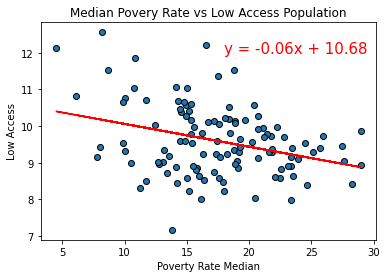

In [23]:
#repeat for poverty rate median, and low access
x_1_values = poverty_info["Poverty Rate Median"]
y_1_values = np.log(poverty_info["Low Access"])
(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_1_values, y_1_values)
regress_values_1 = x_1_values * slope_1 + intercept_1
line_eq_1 = "y = " + str(round(slope_1,2)) + "x + " + str(round(intercept_1,2))
plt.scatter(x_1_values,y_1_values, marker ="o", edgecolor='black')
plt.title("Median Povery Rate vs Low Access Population")
plt.plot(x_1_values,regress_values_1,"r-")
plt.annotate(line_eq_1,(18,12),fontsize=15,color="red")
plt.xlabel("Poverty Rate Median")
plt.ylabel("Low Access")
print(f'The rvalue is:{rvalue_1}')

plt.savefig("output_data/PovertyRateMedian.png")

plt.show()

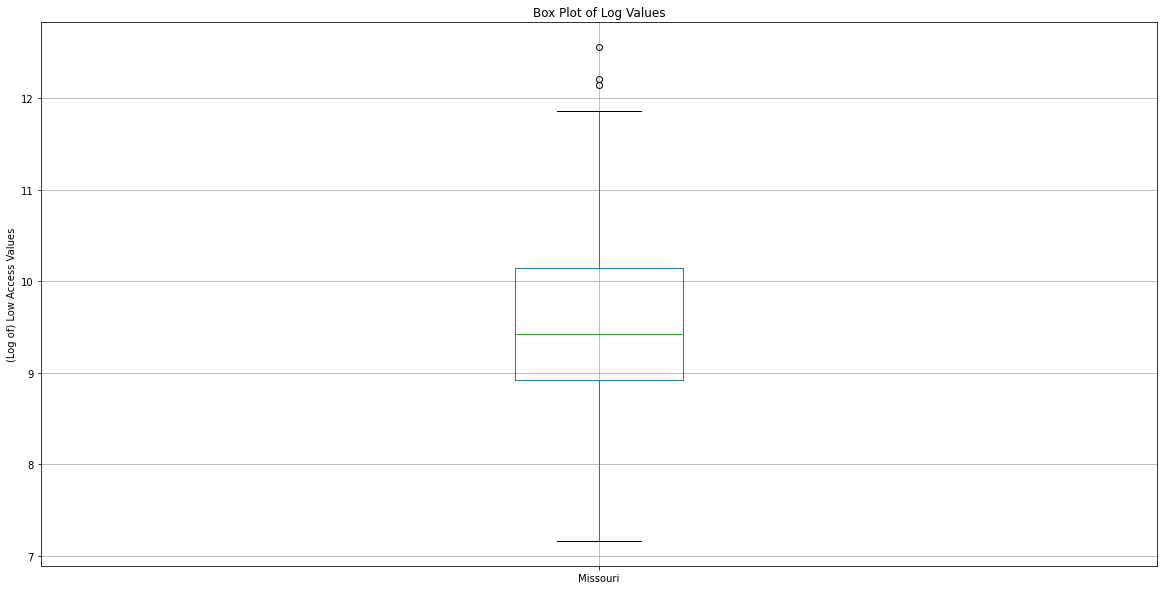

In [50]:
#create a boxplot to see the distribution of data and visualize any outliers. log is used to shrink data values
poverty_info['Log Values'] = np.log(poverty_info['Low Access'])
#create list for x_ticks
state_lst=["Missouri"]
#create,show, and save boxplot
b_plot=poverty_info.boxplot("Log Values", figsize=(20, 10))
plt.title("Box Plot of Log Values")
plt.ylabel("(Log of) Low Access Values")
b_plot.set_xticklabels(state_lst)
plt.savefig("output_data/LowAccessPopBoxPlot.png")
plt.show()